# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [22]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint 
from functions_variables import encode_tags
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [23]:
# Step 1: List files in the 'data' folder
data_folder = '../data/'
files = [f for f in os.listdir(data_folder) if f.endswith('.json')]

# Load one JSON file
sample_file = os.path.join(data_folder, files[0])  # Load the first JSON file
with open(sample_file, 'r') as f:
    data = json.load(f)

#  Inspect the data structure
pprint(data)  # Print the raw JSON data

# Flatten and inspect with Pandas
df = pd.json_normalize(data)  # Flatten the JSON (if needed)
print(df.head())  # Show first few rows

{'data': {'count': 8,
          'results': [{'branding': [{'name': 'EXP Realty LLC - Southeast '
                                             'Alaska',
                                     'photo': None,
                                     'type': 'Office'}],
                       'community': None,
                       'description': {'baths': 2,
                                       'baths_1qtr': None,
                                       'baths_3qtr': None,
                                       'baths_full': 2,
                                       'baths_half': None,
                                       'beds': 3,
                                       'garage': 1,
                                       'lot_sqft': 10454,
                                       'name': None,
                                       'sold_date': '2023-09-18',
                                       'sold_price': None,
                                       'sqft': 1821,
                      

In [24]:
print(df.info())  # Check data types and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        1 non-null      int64 
 1   data.total    1 non-null      int64 
 2   data.count    1 non-null      int64 
 3   data.results  1 non-null      object
dtypes: int64(3), object(1)
memory usage: 164.0+ bytes
None


In [25]:
with open(os.path.join(data_folder, files[0]), 'r') as f:
    sample_data = json.load(f)

# Print the structure of the JSON file
import pprint
pprint.pprint(sample_data)


{'data': {'count': 8,
          'results': [{'branding': [{'name': 'EXP Realty LLC - Southeast '
                                             'Alaska',
                                     'photo': None,
                                     'type': 'Office'}],
                       'community': None,
                       'description': {'baths': 2,
                                       'baths_1qtr': None,
                                       'baths_3qtr': None,
                                       'baths_full': 2,
                                       'baths_half': None,
                                       'beds': 3,
                                       'garage': 1,
                                       'lot_sqft': 10454,
                                       'name': None,
                                       'sold_date': '2023-09-18',
                                       'sold_price': None,
                                       'sqft': 1821,
                      

In [26]:

dataframes = []

for file in files:
    file_path = os.path.join(data_folder, file)
    
    with open(file_path, 'r') as f:
        data = json.load(f)
        
        # Check if 'data' and 'results' keys exist
        if 'data' in data and 'results' in data['data']:
            results = data['data']['results']
            
            sales_data = []
            for result in results:
                if 'description' in result:
                    description = result['description']
                    # Extract tags, city, state, and list_price
                    tags = result.get('tags', [])
                    city = result.get('location', {}).get('address', {}).get('city', None)
                    state = result.get('location', {}).get('address', {}).get('state', None)
                    list_price = result.get('list_price', None)
                    
                    # Combine extracted fields into one dictionary
                    combined_entry = {
                        **description,
                        'tags': tags,
                        'city': city,
                        'state': state,
                        'list_price': list_price
                    }
                    sales_data.append(combined_entry)
            
            # Normalize the combined data
            if sales_data:
                df = pd.json_normalize(sales_data)
                dataframes.append(df)

# Combine all into a single DataFrame
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print(combined_df.head())  # Display the first few rows
else:
    print("No valid sales data found.")


   year_built  baths_3qtr   sold_date  sold_price  baths_full  name  \
0      1963.0         NaN  2023-09-18         NaN         2.0  None   
1         NaN         NaN  2023-08-22         NaN         NaN  None   
2         NaN         NaN  2023-08-22         NaN         NaN  None   
3         NaN         NaN  2023-08-21         NaN         NaN  None   
4         NaN         NaN  2023-08-21         NaN         NaN  None   

   baths_half  lot_sqft    sqft  baths sub_type baths_1qtr  garage  stories  \
0         NaN   10454.0  1821.0    2.0     None       None     1.0      NaN   
1         NaN       NaN     NaN    NaN     None       None     NaN      NaN   
2         NaN       NaN     NaN    NaN     None       None     NaN      NaN   
3         NaN       NaN     NaN    NaN     None       None     NaN      NaN   
4         NaN       NaN     NaN    NaN     None       None     NaN      NaN   

   beds           type                                               tags  \
0   3.0  single_famil

C:\Users\krish\AppData\Local\Temp\ipykernel_12028\150664479.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dataframes, ignore_index=True)


In [27]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_built  7316 non-null   float64
 1   baths_3qtr  566 non-null    float64
 2   sold_date   8159 non-null   object 
 3   sold_price  6716 non-null   float64
 4   baths_full  7311 non-null   float64
 5   name        0 non-null      object 
 6   baths_half  2281 non-null   float64
 7   lot_sqft    6991 non-null   float64
 8   sqft        7323 non-null   float64
 9   baths       7980 non-null   float64
 10  sub_type    1427 non-null   object 
 11  baths_1qtr  0 non-null      object 
 12  garage      4448 non-null   float64
 13  stories     6260 non-null   float64
 14  beds        7504 non-null   float64
 15  type        8125 non-null   object 
 16  tags        7638 non-null   object 
 17  city        8154 non-null   object 
 18  state       8159 non-null   object 
 19  list_price  7721 non-null  

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [28]:
# Inspect the first few rows
print(combined_df.head())

# Check data types and missing values
print(combined_df.info())
print(combined_df.isnull().sum())


   year_built  baths_3qtr   sold_date  sold_price  baths_full  name  \
0      1963.0         NaN  2023-09-18         NaN         2.0  None   
1         NaN         NaN  2023-08-22         NaN         NaN  None   
2         NaN         NaN  2023-08-22         NaN         NaN  None   
3         NaN         NaN  2023-08-21         NaN         NaN  None   
4         NaN         NaN  2023-08-21         NaN         NaN  None   

   baths_half  lot_sqft    sqft  baths sub_type baths_1qtr  garage  stories  \
0         NaN   10454.0  1821.0    2.0     None       None     1.0      NaN   
1         NaN       NaN     NaN    NaN     None       None     NaN      NaN   
2         NaN       NaN     NaN    NaN     None       None     NaN      NaN   
3         NaN       NaN     NaN    NaN     None       None     NaN      NaN   
4         NaN       NaN     NaN    NaN     None       None     NaN      NaN   

   beds           type                                               tags  \
0   3.0  single_famil

In [29]:
# Drop columns with more than 50% missing values
combined_df = combined_df.dropna(thresh=len(combined_df) * 0.5, axis=1)

# Fill missing values for numeric columns
combined_df['sqft'].fillna(combined_df['sqft'].median(), inplace=True)
combined_df['year_built'].fillna(2000, inplace=True)  # Example

print(combined_df['year_built'])


0       1963.0
1       2000.0
2       2000.0
3       2000.0
4       2000.0
         ...  
8154    1910.0
8155    2000.0
8156    2000.0
8157    2000.0
8158    1950.0
Name: year_built, Length: 8159, dtype: float64


C:\Users\krish\AppData\Local\Temp\ipykernel_12028\655271854.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['sqft'].fillna(combined_df['sqft'].median(), inplace=True)
C:\Users\krish\AppData\Local\Temp\ipykernel_12028\655271854.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [30]:
# Replace NaN values in the 'garage' column with 0
combined_df['garage'].fillna(0, inplace=True)

# Ensure the 'garage' column is of integer type
combined_df['garage'] = combined_df['garage'].astype(int)

# Check if the operation was successful
print(combined_df['garage'].value_counts())


garage
0     3711
2     2747
1     1153
3      427
4       70
5       19
6       12
11      10
9        5
8        5
Name: count, dtype: int64


C:\Users\krish\AppData\Local\Temp\ipykernel_12028\4269168903.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['garage'].fillna(0, inplace=True)


In [31]:
# Convert sold_date to datetime
combined_df['sold_date'] = pd.to_datetime(combined_df['sold_date'], errors='coerce')

# Ensure numeric columns are in correct format
combined_df['sold_price'] = pd.to_numeric(combined_df['sold_price'], errors='coerce')


In [32]:
# Remove duplicate rows based on certain columns
combined_df = combined_df.drop_duplicates(subset=['sqft', 'sold_date', 'sold_price'], keep='first')

In [33]:
# Remove outliers based on 'sold_price'
q1 = combined_df['sold_price'].quantile(0.25)
q3 = combined_df['sold_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
combined_df = combined_df[(combined_df['sold_price'] >= lower_bound) & (combined_df['sold_price'] <= upper_bound)]

In [34]:
# Creating new features(price_per_sqft and age_of_house) based on provided data 
combined_df['price_per_sqft'] = combined_df['sold_price'] / combined_df['sqft']
combined_df['age_of_house'] = 2024 - combined_df['year_built']


In [35]:
# Checking the data after cleaning and wrangling data
print(combined_df)

      year_built  sold_date  sold_price  baths_full  lot_sqft    sqft  baths  \
30        1998.0 2024-01-16    129900.0         2.0   11761.0  1478.0    2.0   
31        1945.0 2024-01-16     88500.0         2.0    6534.0  1389.0    2.0   
32        1969.0 2024-01-16    145000.0         2.0   17424.0  2058.0    2.0   
33        1955.0 2024-01-16     65000.0         2.0    9712.0  1432.0    2.0   
34        1984.0 2024-01-12    169000.0         2.0   10890.0  1804.0    2.0   
...          ...        ...         ...         ...       ...     ...    ...   
7993      1910.0 2023-07-27     99000.0         1.0    4792.0  1214.0    1.0   
7994      2000.0 2023-07-27     29700.0         1.0    7841.0   988.0    1.0   
7995      2000.0 2023-07-24    162250.0         1.0   65340.0  1470.0    1.0   
7996      2000.0 2023-07-24     63800.0         NaN       NaN  1635.0    0.0   
8038      1950.0 2023-07-21    115500.0         2.0   52272.0  3858.0    2.0   

      garage  stories  beds           t

In [36]:
# Check data types and missing values
print(combined_df.info())
print(combined_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1380 entries, 30 to 8038
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year_built      1380 non-null   float64       
 1   sold_date       1380 non-null   datetime64[ns]
 2   sold_price      1380 non-null   float64       
 3   baths_full      1246 non-null   float64       
 4   lot_sqft        1197 non-null   float64       
 5   sqft            1380 non-null   float64       
 6   baths           1350 non-null   float64       
 7   garage          1380 non-null   int32         
 8   stories         1037 non-null   float64       
 9   beds            1282 non-null   float64       
 10  type            1376 non-null   object        
 11  tags            1308 non-null   object        
 12  city            1379 non-null   object        
 13  state           1380 non-null   object        
 14  list_price      1328 non-null   float64       
 15  price_pe

In [37]:
print(combined_df.info())
print(combined_df.describe())

# Save cleaned DataFrame
combined_df.to_csv('housing_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 1380 entries, 30 to 8038
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year_built      1380 non-null   float64       
 1   sold_date       1380 non-null   datetime64[ns]
 2   sold_price      1380 non-null   float64       
 3   baths_full      1246 non-null   float64       
 4   lot_sqft        1197 non-null   float64       
 5   sqft            1380 non-null   float64       
 6   baths           1350 non-null   float64       
 7   garage          1380 non-null   int32         
 8   stories         1037 non-null   float64       
 9   beds            1282 non-null   float64       
 10  type            1376 non-null   object        
 11  tags            1308 non-null   object        
 12  city            1379 non-null   object        
 13  state           1380 non-null   object        
 14  list_price      1328 non-null   float64       
 15  price_pe

        year_built                      sold_date     sold_price   baths_full  \
count  1380.000000                           1380    1380.000000  1246.000000   
mean   1969.766667  2023-12-20 09:29:44.347825920  324187.628261     1.806581   
min    1828.000000            2023-07-21 00:00:00     308.000000     1.000000   
25%    1950.000000            2023-12-21 00:00:00  185000.000000     1.000000   
50%    1976.000000            2024-01-05 00:00:00  299000.000000     2.000000   
75%    2000.000000            2024-01-11 00:00:00  430250.000000     2.000000   
max    2023.000000            2024-01-17 00:00:00  891000.000000     6.000000   
std      35.223835                            NaN  190048.513494     0.748968   

           lot_sqft         sqft        baths       garage      stories  \
count  1.197000e+03  1380.000000  1350.000000  1380.000000  1037.000000   
mean   1.414307e+05  1755.419565     2.042222     0.955072     1.567985   
min    0.000000e+00   120.000000     0.000000

### Dealing with Tags

In [38]:
from collections import Counter

#  Count unique values in 'city' and 'state'
num_unique_cities = combined_df['city'].nunique()
num_unique_states = combined_df['state'].nunique()

#  Flatten the 'tags' column and count unique tags
all_tags = combined_df['tags'].explode().dropna().tolist()
tag_counts = Counter(all_tags)

#  Calculate total columns if OHE is applied
num_unique_tags = len(tag_counts)
total_ohe_columns = num_unique_tags + num_unique_cities + num_unique_states
print(f"Total OHE columns: {total_ohe_columns}")

#  Filter out tags with low frequency (e.g., less than 10 occurrences)
threshold = 10
filtered_tags = [tag for tag, count in tag_counts.items() if count >= threshold]

print(f"Number of tags before filtering: {num_unique_tags}")
print(f"Number of tags after filtering: {len(filtered_tags)}")


Total OHE columns: 268
Number of tags before filtering: 149
Number of tags after filtering: 102


In [39]:
#  Apply the filtering to the DataFrame
combined_df['filtered_tags'] = combined_df['tags'].apply(
    lambda tag_list: [tag for tag in tag_list if tag in filtered_tags] if isinstance(tag_list, list) else []
)

#  Preview the filtered DataFrame
print(combined_df[['city', 'state', 'filtered_tags']].head())

          city    state                                      filtered_tags
30  Montgomery  Alabama  [central_air, central_heat, community_outdoor_...
31  Montgomery  Alabama  [city_view, hardwood_floors, two_or_more_stori...
32  Montgomery  Alabama  [carport, central_air, central_heat, dishwashe...
33  Montgomery  Alabama  [carport, central_air, city_view, community_ou...
34  Montgomery  Alabama  [city_view, single_story, big_yard, fenced_yar...


### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [40]:
# perform train test split here
# do something with state and city

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [41]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

Question : What is the relationship between house size (in square footage) and sold price?

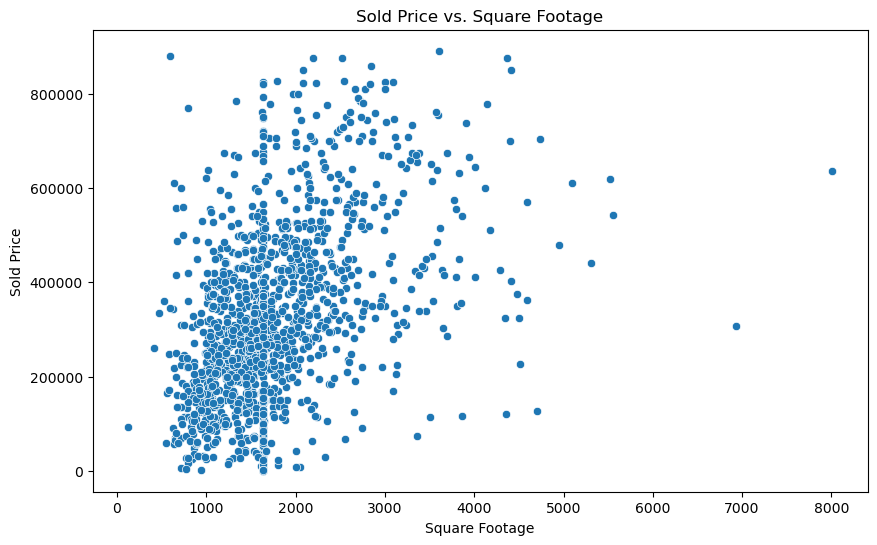

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df['sqft'], y=combined_df['sold_price'])
plt.title('Sold Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Sold Price')
plt.show()


Answer: As the house size increases so does the sold price. This shows positive correlation between the house size and sold price

Question: How have average sold prices changed over the years per city?

Highest Average Sold Price:
    sold_year      city  sold_price
24       2023  Honolulu    880000.0

Lowest Average Sold Price:
    sold_year              city  sold_price
42       2023  South Charleston     22000.0


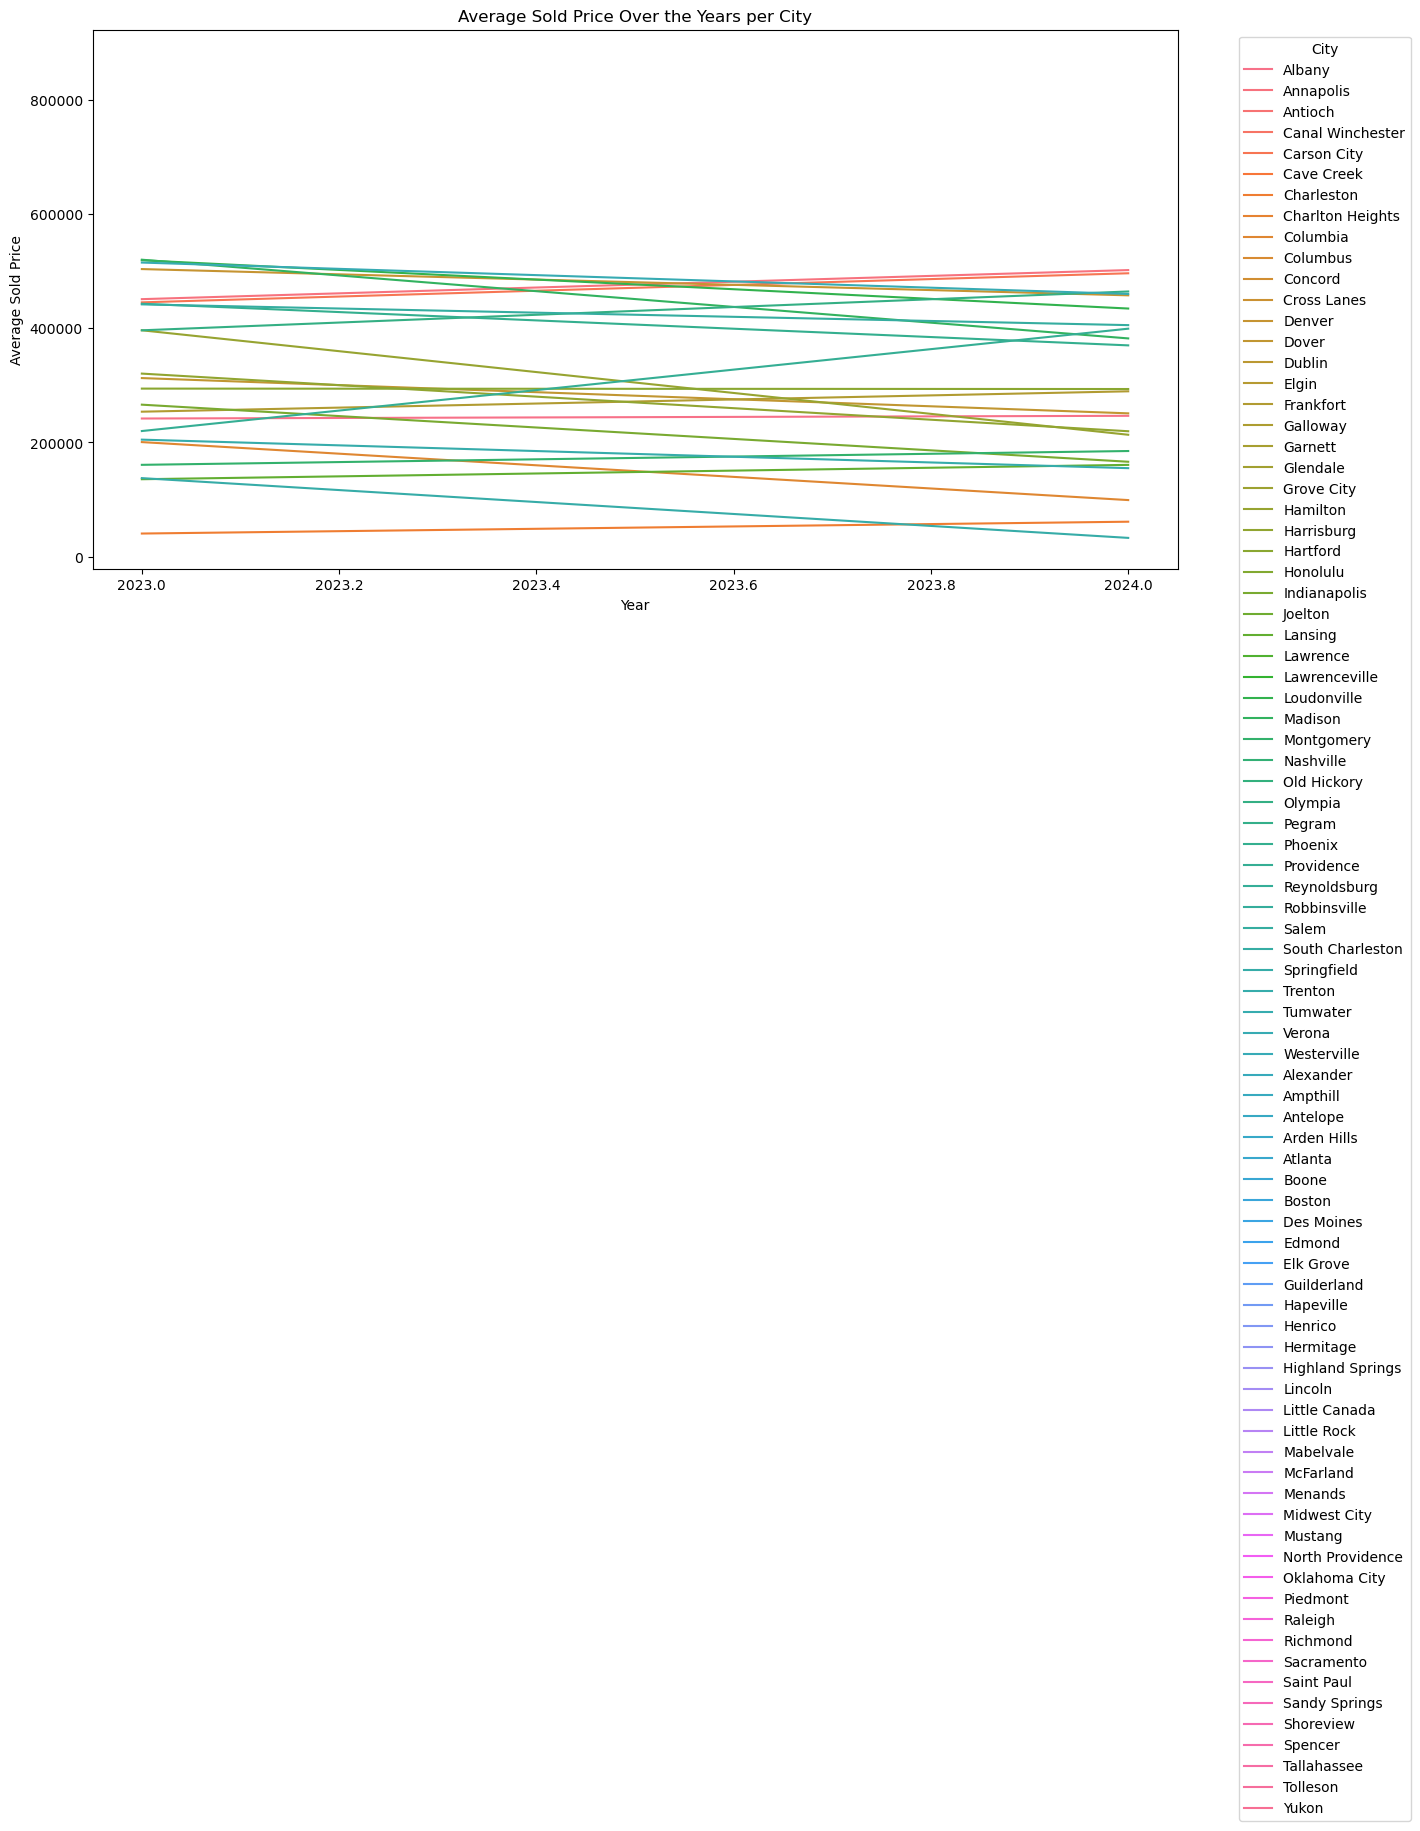

In [50]:
combined_df['sold_year'] = combined_df['sold_date'].dt.year

avg_sold_price_by_year_city = combined_df.groupby(['sold_year', 'city'])['sold_price'].mean().reset_index()
highest_avg_price = avg_sold_price_by_year_city.sort_values(by='sold_price', ascending=False).head(1)
lowest_avg_price = avg_sold_price_by_year_city.sort_values(by='sold_price', ascending=True).head(1)

print("Highest Average Sold Price:")
print(highest_avg_price)

print("\nLowest Average Sold Price:")
print(lowest_avg_price)

plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_sold_price_by_year_city, x='sold_year', y='sold_price', hue='city')
plt.title('Average Sold Price Over the Years per City')
plt.xlabel('Year')
plt.ylabel('Average Sold Price')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Answer: The city with the highest average sold price is Honolulu ($880,000) and the lowest average sold price is South Charleston ($22,000)

Question: How does the year built of the house affect the price of the house

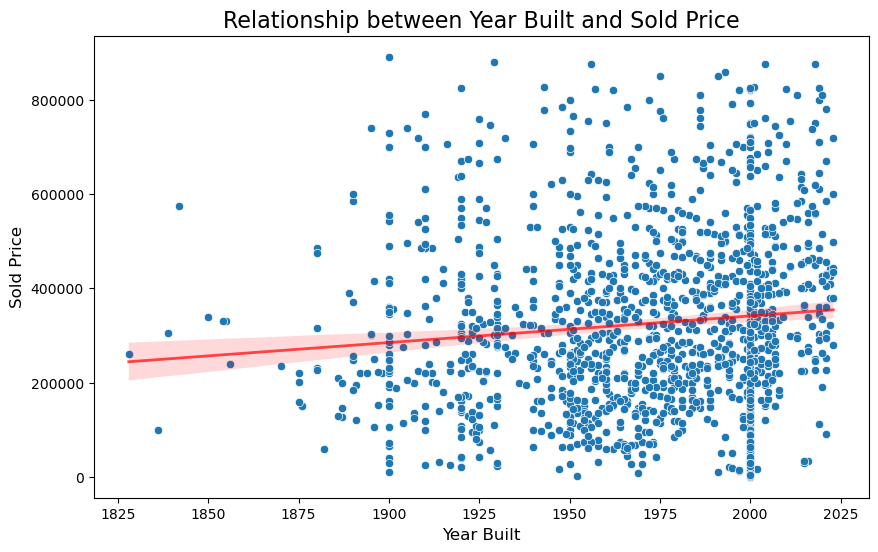

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='year_built', y='sold_price')
sns.regplot(data=combined_df, x='year_built', y='sold_price', scatter=False, color='red', line_kws={"color": "red", "alpha": 0.7, "lw": 2})
plt.title('Relationship between Year Built and Sold Price', fontsize=16)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Sold Price', fontsize=12)
plt.show()

Answer: The newer the house, the higher the sold price. There is a positive correlation between houses built in recent years and the sold price

Question: Given the dataset, can we predict the future price of the house per city?
Answer: It is possible to predict the future price of the house per city by using a machine learning model like the Random Forest Regressor based on the features provided in the dataset.

Question: What features of the house should the developers focus on more to maxime the property value 
Answer: Developers should focus on the following key features to maximize property value:
Square Footage (sqft): Larger homes have higher prices.
Location: Cities and neighborhoods with more demand will have higher-priced homes.
Number of Bedrooms (beds) and Bathrooms (baths): More of these features translate to a higher price.
Year Built (year_built): Newer homes have a higher value.

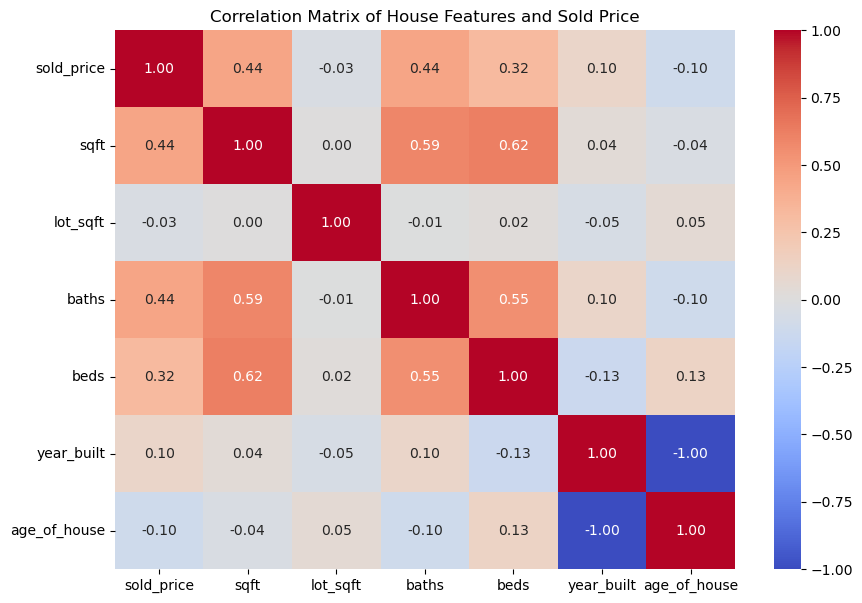

In [ ]:
correlation_matrix = combined_df[['sold_price', 'sqft', 'lot_sqft', 'baths', 'beds', 'year_built', 'age_of_house']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix of House Features and Sold Price")
plt.show()

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized